# Breast Cancer Classification Model

Richard Kaldenhoven

The dataset used in this notebook is available at:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


## 1. Problem Definition

The objective of this project is to build a binary classification machine learning model that will predict if a patient has breast cancer (malignant) or not (benign) based on features contained in the dataset. The dataset contains measurements of cell nuclei that have been imaged from a sample of breast tumor mass. The measurements in the dataset form the features that the model will learn from, and have a matching diagnosis label that is the target to be predicted. The diagnosis labels are "M" for malignant, and "B" for benign.


## 2. Load and Clean Data

The code below loads and previews the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_180_408_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

With the exception of the empty `Unnamed: 32` column, there are no missing data values. The `Unnamed: 32` column is dropped as it contains no information.

In [5]:
# column has no information, and no obvious label, so is dropped
df.drop('Unnamed: 32',axis=1,inplace=True)

The `diagnosis` target column values are text, which is not a useful form for a machine learning model. The `mal_or_benign` function below converts the text values into one of two binary classes: "1" for malignant, and "0" for benign. `mal_or_benign` is then applied to the `diagnosis` column to convert the values.

In [6]:
def mal_or_benign(column):
    diagnosis = column[0]
    
    if diagnosis == 'M':
        return 1
    else:
        return 0

In [7]:
# convert text diagnosis to 0 (benign) and 1 (malignant)
df['diagnosis'] = df['diagnosis'].apply(mal_or_benign)

The `id` column is also not needed, so it is removed.

In [8]:
# drop id column, not needed
df.drop('id',axis=1,inplace=True)

A preview of the cleaned data:

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Exploratory Data Analysis

The plot below shows the balance of classes in the dataset. There are 357 samples of benign diagnoses (0), and 212 samples of malignant diagnoses (1).

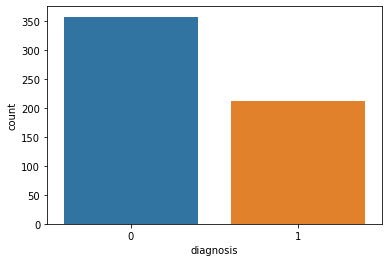

In [10]:
sns.countplot(x='diagnosis',data=df)

In [11]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Correlation coefficients between all features and the target are calculated to gain a better understanding of which features contribute more strongly to a malignant diagnosis:

In [12]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

The heatmap below provides a easier visualization of the correlation coefficients. More strongly correlated variables with `diagnosis` are located in the top left corner of the heatmap.

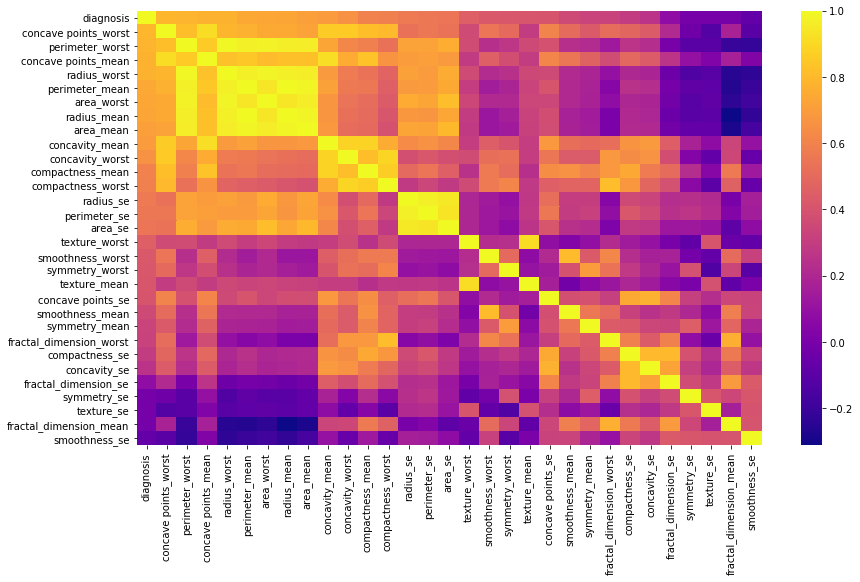

In [13]:
plt.figure(figsize=(14,8))
corr_list = df.corr()['diagnosis'].sort_values(ascending=False).index.to_list()
sns.heatmap(df[corr_list].corr(),cmap='plasma')

From the heatmap, the most strongly correlated (value> 0.75) features with 'diagnosis' are:
* concave points_worst       0.793566
* perimeter_worst            0.782914
* concave points_mean        0.776614
* radius_worst               0.776454

The heatmap shows that there is also multicollinearity between features such as radius_worst and area_worst, which makes sense given that they are related to each other.

There are no strongly negative correlated features with 'diagnosis'.

## 4. Data Preparation

In order to use the data in a machine learning model, it is split into train and test sets, where the training set is used to fit the model to the data and the test set is used for performance evaluation.

Once a train/test split is created, the data is scaled by subtracting the mean and dividing by the standard deviation. Data scaling keeps the features of the data within the same range, so that features do not become dominant over each other, which is important when distance based models are used, as will be shown in the next section.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 4. Model Development

Two types of machine learning models will be developed and compared: K Nearest Neighbors and a Random Forest. The following sections contain code showing how the models are developed and predictions for the `diagnosis` target are generated.

### 4.1 K Nearest Neighbors Model




In [17]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,51):
    
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,y_train)
    pred_i = model_knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

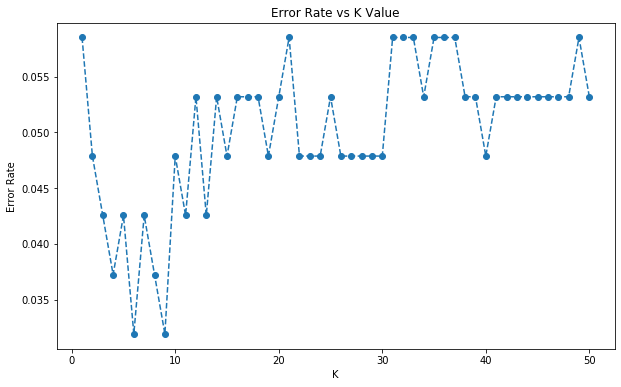

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,linestyle='dashed',marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The lowest error rate occurs with a K value = 9.

In [19]:
model_knn = KNeighborsClassifier(n_neighbors=9)

model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [20]:
predictions_knn = model_knn.predict(X_test)

### 4.2 Random Forest Model


In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=800,random_state=42)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
predictions_rfc = model_rfc.predict(X_test)

## 5. Comparing Model Results

Performance metrics for the K Nearest Neighbors and Random Forest models are printed below:

In [23]:
from sklearn.metrics import classification_report

print('Performance metrics for the K Nearest Neighbors model on the test set')
print(classification_report(y_test,predictions_knn))

print('\n')

print('Performance metrics for the Random Forest model on the test set')
print(classification_report(y_test,predictions_rfc))

Performance metrics for the K Nearest Neighbors model on the test set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



Performance metrics for the Random Forest model on the test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.95      0.93      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



The K Nearest Neighbors model has higher F1 scores for each class, as well as a slightly higher macro avg F1 score (0.97 vs 0.95) compared to the Random Forest Model. The F1 score is more applicable to this problem than the accuracy, since exploratory data analysis showed that the classes are imbalanced. The 'support' column shows how many samples of each class are in the test set, with 121 benign (0) samples and 67 malignant (1) samples, so the test set is also imbalanced. 

Since this problem deals with predicting medical diagnoses, false negative and false positive predictions should be minimized in order to not mis-diagnose a patient. The F1 score is a convenient single value performance metric that considers the effects of false negatives and false positives, whereas the accuracy metric is more about the number of correct true negative and true positive predictions.

The confusion matrices for each model are given in the plots below:

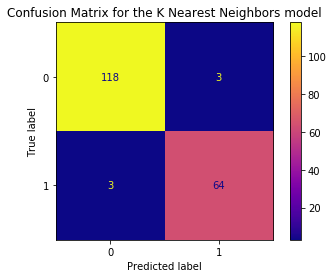

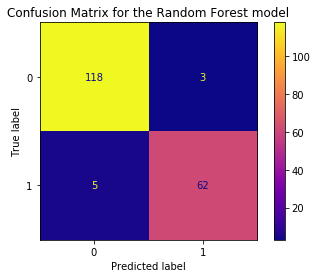

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_knn, X_test, y_test, values_format='', cmap='plasma')
plt.title('Confusion Matrix for the K Nearest Neighbors model')

plot_confusion_matrix(model_rfc, X_test, y_test, values_format='', cmap='plasma')
plt.title('Confusion Matrix for the Random Forest model');

The K Nearest Neighbors model has a lower number of false negative predictions (3) compared to the Random Forest model.

## 6. Conclusion

To aid in the diagnosis of breast cancer, a K Nearest Neighbors machine learning model with an F1 score of 0.97 has been developed to predict whether a patient has a malignant or benign tumor.